# Bibliotecas

In [1]:
%run libs.py

# Ingest Data

## cargo das

In [2]:
df_DAS = pd.read_csv('data/cargodas.csv.gz', compression='gzip')
df_DAS.shape

(371789, 15)

## df militares

In [3]:
df_militares = pd.read_csv('data/df_militares.csv.gz',compression='gzip')
df_militares.shape

/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(376678, 44)

# Merge

In [4]:
print('df_militares', df_militares.shape)
print('df_DAS', df_DAS.shape)

df_militares (376678, 44)
df_DAS (371789, 15)


In [5]:
df_militares['unique_id'] = df_militares['NOME'] + \
    df_militares['CPF'].str.replace('[.-]', '', regex=True)
df_DAS['unique_id'] = df_DAS['Nome'] + \
    df_DAS['CPF'].str.replace('[.-]', '', regex=True)

![Figure 1-1](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png "Figure 1-1")

Vamos juntar as tabelas de Militares e DAS em uma só usando a propriedade 'INNER' para garantir que temos somente os militares em cargos DAS. Mas para isso precisamos criar uma chave única formada por nome do servidor + CPF.

In [6]:
df_DAS_mil = pd.merge(df_DAS, df_militares, how='inner', on='unique_id')
print('df_DAS_mil', df_DAS_mil.shape)

df_DAS_mil (6497, 60)


In [7]:
df_DAS_mil.sample()

,Unnamed: 0_x,Nome,CPF_x,Descrição do cargo emprego,Nível de Escolaridade,Situação servidor,Denominação do órgão de atuação,UF da UPAG de vinculação,Denominação unidade organizacional,UF da Residência,Cidade da residência,Data início DAS,DL nomeação,Valor da DAS,Unnamed: 14,unique_id,Unnamed: 0_y,Id_SERVIDOR_PORTAL,NOME,CPF_y,MATRICULA,DESCRICAO_CARGO,CLASSE_CARGO,REFERENCIA_CARGO,PADRAO_CARGO,NIVEL_CARGO,SIGLA_FUNCAO,NIVEL_FUNCAO,FUNCAO,CODIGO_ATIVIDADE,ATIVIDADE,OPCAO_PARCIAL,COD_UORG_LOTACAO,UORG_LOTACAO,COD_ORG_LOTACAO,ORG_LOTACAO,COD_ORGSUP_LOTACAO,ORGSUP_LOTACAO,COD_UORG_EXERCICIO,UORG_EXERCICIO,COD_ORG_EXERCICIO,ORG_EXERCICIO,COD_ORGSUP_EXERCICIO,ORGSUP_EXERCICIO,TIPO_VINCULO,SITUACAO_VINCULO,DATA_INICIO_AFASTAMENTO,DATA_TERMINO_AFASTAMENTO,REGIME_JURIDICO,JORNADA_DE_TRABALHO,DATA_INGRESSO_CARGOFUNCAO,DATA_NOMEACAO_CARGOFUNCAO,DATA_INGRESSO_ORGAO,DOCUMENTO_INGRESSO_SERVICOPUBLICO,DATA_DIPLOMA_INGRESSO_SERVICOPUBLICO,DIPLOMA_INGRESSO_CARGOFUNCAO,DIPLOMA_INGRESSO_ORGAO,DIPLOMA_INGRESSO_SERVICOPUBLICO,UF_EXERCICIO,file
1625,2591,ELIAS DOS REIS,***512938**,NaN,ENSINO MEDIO,REQ. MILITAR F. ARM,COMANDO DO EXERCITO,DF,GERENCIA DE ADMINIST.DE RECURSOS HUMANOS,SP,SAO PAULO,20110606,"DEC 009038/2017, AUT.EXT.: PR PUB: DO 27ABR2017","1480,74",NaN,ELIAS DOS REIS***512938**,99814,8303246,ELIAS DOS REIS,***.512.938-**,026****,Terceiro-Sargento,0,0,0,0,-1,-1,Sem informação,-1,Sem informação,NaN,-1,Sem informação,16000,Comando do Exército,40105,Ministério da Defesa,-1,Sem informação,16000,Comando do Exército,40105,Ministério da Defesa,2,MILITAR DA ATIVA,NaN,NaN,ESTATUTO DOS MILITARES,DSPN. PERMANENTE,NaN,NaN,NaN,NaN,NaN,NaN,Sem informação,Inválido,-1,201505


In [8]:
df_militares_no_governo = df_DAS_mil[[
    'Nome', 'CPF_x', 'ORG_EXERCICIO','ORG_LOTACAO','DESCRICAO_CARGO','Descrição do cargo emprego', 'Situação servidor',
    'Denominação do órgão de atuação', 'UF da UPAG de vinculação',
    'Denominação unidade organizacional', 'UF da Residência',
    'Cidade da residência', 'Data início DAS', 'DL nomeação', 'Valor da DAS',
    'unique_id', 'Id_SERVIDOR_PORTAL', 'MATRICULA',
    'UF_EXERCICIO', 'file'
]]

In [9]:
df_militares_no_governo['DESCRICAO_CARGO'].value_counts()

Coronel                                 1158
Segundo-Sargento                         810
Primeiro-Tenente                         737
Tenente-Coronel                          479
Segundo-Tenente                          369
Suboficial                               315
Terceiro-Sargento                        309
Primeiro-Sargento                        277
Cabo (engajado)                          245
Capitao-de-Mar-e-Guerra                  236
Capitao                                  201
Major                                    194
General-de-Brigada                       162
General-de-Divisao                       157
Brigadeiro                               134
Subtenente                               122
Contra-Almirante                          93
Soldado                                   78
Tenente-Brigadeiro-do-Ar                  77
Capitao-de-Fragata                        71
General-de-Exercito                       56
Vice-Almirante                            46
Major-Brig

In [10]:
filter_ = 'Soldado|Cabo'
df_oficiais_no_governo = df_militares_no_governo[~(
    df_militares_no_governo['DESCRICAO_CARGO'].str.contains(filter_))]

In [11]:
df_oficiais_no_governo[(
    df_oficiais_no_governo['Denominação do órgão de atuação'].str.contains(
        'JUSTI'))]['Denominação do órgão de atuação'].value_counts()

MINIST. DA JUSTIÇA E SEGURANÇA PUBLICA    118
MINISTERIO DA JUSTIÇA                      50
MINISTERIO DA JUSTICA                      48
MINISTERIO DA JUSTIA                       3
Name: Denominação do órgão de atuação, dtype: int64

In [12]:
teste = df_oficiais_no_governo.copy()
col = 'Denominação do órgão de atuação'
teste[col] = teste[col].str.replace(('.*' + 'JUSTI.*A' + '.*'),
                                    ('MINISTERIO DA JUSTIÇA'),
                                    regex=True)
teste[col] = teste[col].str.replace(
    ('.*' + 'ESTADOS.*MUNICIPIOS' + '.*'),
    ('ESTADOS/MUNICIPIOS/ADM.DIR-AUT/FUNDACOES'),
    regex=True)
teste[col] = teste[col].str.replace(
    ('.*' + 'MINIST.DA CI' + '.*'),
    ('MINISTÉRIO CIÊNCIA TEC.INOV.COMUNICAÇÕES'),
    regex=True)
teste[col] = teste[col].str.replace(('.*' + 'HUMANOS' + '.*'),
                                    ('MINISTERIO DOS DIREITOS HUMANOS'),
                                    regex=True)
pd.DataFrame(teste[col].value_counts())

,Denominação do órgão de atuação
COMANDO DO EXERCITO,1533
PRESIDENCIA DA REPUBLICA,1147
MINISTERIO DA DEFESA,941
COMANDO DA MARINHA,481
COMANDO DA AERONAUTICA,425
MINISTERIO DA JUSTIÇA,219
MINISTERIO DA EDUCACAO,141
VICE-PRESIDENCIA DA REPUBLICA,105
MINISTERIO DA CIDADANIA,98
DEPARTAMENTO NAC.DE INFRAEST. DE TRANSP.,96


In [13]:
teste['Data início DAS'] = pd.to_datetime(teste['Data início DAS'],
                                          format="%Y%m%d")
teste2 = teste[(teste['Data início DAS'] > '2018-12-31')
               & (teste['Data início DAS'] < '2021-01-01')]

In [14]:
print(teste.shape)
print(teste2.shape)
print(teste.drop_duplicates().shape)

(6131, 20)
(2501, 20)
(1969, 20)


In [15]:
teste = teste.drop_duplicates()

In [16]:
teste_teste = teste.copy()
Dilma_Rousseff = (teste['Data início DAS'] >=
                  '2011-01-01') & (teste['Data início DAS'] < '2016-08-31')
Michel_Temer = (teste['Data início DAS'] >=
                '2016-08-01') & (teste['Data início DAS'] < '2019-01-01')
Jair_Bolsonaro = (teste['Data início DAS'] >=
                  '2019-01-01') & (teste['Data início DAS'] < '2022-01-01')

teste.loc[Dilma_Rousseff, 'presidente'] = 'Dilma Rousseff'
teste.loc[Michel_Temer, 'presidente'] = 'Michel Temer'
teste.loc[Jair_Bolsonaro, 'presidente'] = 'Jair Bolsonaro'

teste.head()

,Nome,CPF_x,ORG_EXERCICIO,ORG_LOTACAO,DESCRICAO_CARGO,Descrição do cargo emprego,Situação servidor,Denominação do órgão de atuação,UF da UPAG de vinculação,Denominação unidade organizacional,UF da Residência,Cidade da residência,Data início DAS,DL nomeação,Valor da DAS,unique_id,Id_SERVIDOR_PORTAL,MATRICULA,UF_EXERCICIO,file,presidente
0,IVO BARBOSA LEITE,***035598**,Comando da Marinha,Comando da Marinha,Suboficial,NaN,NOMEADO CARGO COMIS.,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",DF,COORD GERAL ADM DE PESSOAS,GO,AGUAS LINDAS DE GOIAS,2019-03-13,"PORT 001166/2019, SE PUB: DO 13MAR2019","5685,55",IVO BARBOSA LEITE***035598**,213879,057****,-1,201505,Jair Bolsonaro
1,IVO BARBOSA LEITE,***035598**,Comando da Marinha,Comando da Marinha,Suboficial,NaN,NOMEADO CARGO COMIS.,MINISTERIO DA JUSTIÇA,DF,MJ/SE/SAA/CGGP,GO,AGUAS LINDAS DE GOIAS,2019-01-03,"PORT 000022/2019, SE PUB: DO 03JAN2019","10719,07",IVO BARBOSA LEITE***035598**,213879,057****,-1,201505,Jair Bolsonaro
2,IVO BARBOSA LEITE,***035598**,Comando da Marinha,Comando da Marinha,Suboficial,NaN,NOMEADO CARGO COMIS.,MINISTERIO DA DEFESA,DF,GERENCIA DE GESTAO DE PESSOAS,DF,BRASILIA,2017-03-07,"PORT 000782/2017, DEADI PUB: DO 07MAR2017","5440,72",IVO BARBOSA LEITE***035598**,213879,057****,-1,201505,Michel Temer
3,IVO BARBOSA LEITE,***035598**,Comando da Marinha,Comando da Marinha,Suboficial,NaN,NOMEADO CARGO COMIS.,MINISTERIO DA JUSTIÇA,DF,MJ/SE/SAA/CGGP,DF,BRASILIA,2018-05-22,PORTARIA Nº181/CASA CIVIL DOU 22MAI2018,"9926,60",IVO BARBOSA LEITE***035598**,213879,057****,-1,201505,Michel Temer
4,IVO BARBOSA LEITE,***035598**,Comando da Marinha,Comando da Marinha,Suboficial,NaN,NOMEADO CARGO COMIS.,MINISTERIO DA DEFESA,DF,GERENCIA DE GESTAO DE PESSOAS,DF,BRASILIA,2017-03-07,"PORT 000782/2017, DEADI PUB: DO 07MAR2017","5194,01",IVO BARBOSA LEITE***035598**,213879,057****,-1,201505,Michel Temer


/Users/mattosoerick/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


presidente
Dilma Rousseff    132
Jair Bolsonaro    863
Michel Temer      974
Name: Nome, dtype: int64


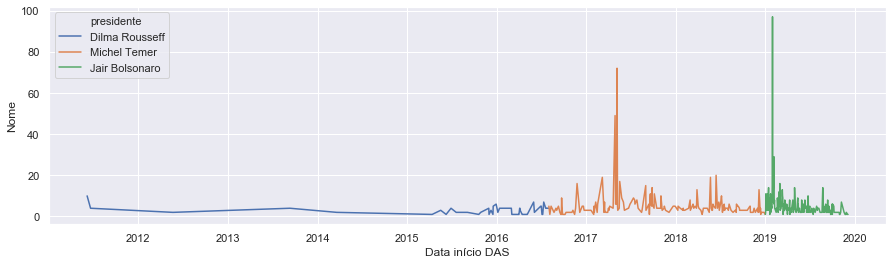

In [17]:
import seaborn as sns
sns.set()
plot_df = pd.DataFrame(
    teste.groupby(['Data início DAS',
                   'presidente'])['Nome'].count()).reset_index()
plt.figure(figsize=(15, 4))
sns.lineplot(x='Data início DAS',
             y='Nome',
             hue="presidente",
             markers="o",
             data=plot_df)
print(teste.groupby(['presidente'])['Nome'].count())

In [18]:
Jair_Bolsonaro = (teste['Data início DAS'] >=
                  '2019-01-01') & (teste['Data início DAS'] < '2022-01-01')
bozonaro = teste[Jair_Bolsonaro]
bozonaro = pd.DataFrame(
    bozonaro.groupby(['Data início DAS',
                      'presidente'])['Nome'].count()).reset_index()
bozonaro.sort_values("Nome", ascending=False).head()

,Data início DAS,presidente,Nome
21,2019-01-30,Jair Bolsonaro,97
25,2019-02-05,Jair Bolsonaro,29
24,2019-02-04,Jair Bolsonaro,20
40,2019-03-01,Jair Bolsonaro,16
20,2019-01-29,Jair Bolsonaro,15


In [19]:
# Save to a compress format
teste[Jair_Bolsonaro].to_csv('data/df_cc.csv.gz', compression='gzip')